In [95]:
# Para Matrizes e Algebra Linear
import numpy as np 

# Para DataFrames e analisar os dados 
import pandas as pd

# Para ler dados da Internet
from pandas_datareader import data as wb
import yfinance as yf
yf.pdr_override()
import investpy as inv

# Para Plotar Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Para Sorteios
from random import randint

In [96]:
#Para começarmos, primeiramente, temos que pegar os ativos da B3.
stocks = inv.stocks.get_stocks(country = 'brazil')

stocks

,country,name,full_name,isin,currency,symbol
0,brazil,ABC BRASIL PN,Banco ABC Brasil SA,BRABCBACNPR4,BRL,ABCB4
1,brazil,BRASILAGRO ON,BrasilAgro - Co ON NM,BRAGROACNOR7,BRL,AGRO3
2,brazil,RUMO ON NM,RUMO Logistica Operadora Multimodal SA,BRRAILACNOR9,BRL,RAIL3
3,brazil,ALPARGATAS ON,Alpargatas SA,BRALPAACNOR0,BRL,ALPA3
4,brazil,ALPARGATAS PN,Alpargatas SA,BRALPAACNPR7,BRL,ALPA4
...,...,...,...,...,...,...
744,brazil,Integral Brei Reit,Fdo Inv Imob Fof Integral Brei Reit,BRIBFFCTF007,BRL,IBFF11
745,brazil,Vbi Cri,Fi Imobiliario Vbi Cri,BRCVBICTF001,BRL,CVBI11
746,brazil,Hedge Realty,Hedge Realty Devl Fdo Inv Imob Etf,BRHRDFCTF000,BRL,HRDF11
747,brazil,Rb Cap,Rb Cap Desenvolvimento Res Iii Fii,BRRSPDCTF006,BRL,RSPD11


Note que temos 749 ativos listados na B3. 

Além disso, perceba que temos códigos com final 11. Esse códigos representam fundos imobiliários, ações units ou BDRs.

Como queremos apenas ações brasileiras, excluiremos os tickers com final 11.

In [97]:
symbols = []

for i in stocks['symbol']:
    if ((i[4] == '3') or (i[4] == '4')) and len(i) <= 5:
        symbols.append(i + '.SA') # Aqui estamos selecionando os ativos de final 3 ou 4 e adicionando .SA no final deles.
        
symbols[:5] # Olhando os 5 primeiros elementos

['ABCB4.SA', 'AGRO3.SA', 'RAIL3.SA', 'ALPA3.SA', 'ALPA4.SA']

In [98]:
start = '2021-1-1' # Definimos uma data de começo e fim dos dados
end = '2022-12-31'
    
# Criamos um data frame e preenchemos com os dados retirados do Yahoo!Finance
stocks_data = pd.DataFrame()
for i in symbols:
    stocks_data[i] = wb.DataReader(i, data_source='yahoo', start = start, end = end)['Adj Close']
    
stocks_data = stocks_data.dropna(axis = 1)
stocks_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BBRK3.SA: No

,ABCB4.SA,AGRO3.SA,RAIL3.SA,ALPA3.SA,ALPA4.SA,ALSO3.SA,AMAR3.SA,ABEV3.SA,ADHM3.SA,ARZZ3.SA,...,PEAB3.SA,CORR4.SA,ENMT4.SA,LUXM4.SA,MERC4.SA,RSUL4.SA,MOAR3.SA,VIVA3.SA,CEAB3.SA,BMGB4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,13.734838,19.258989,19.129074,37.547531,41.191311,27.418396,6.59,14.085718,1.56,65.592354,...,46.156334,63.826683,29.019533,60.984028,10.387522,18.279713,194.505432,27.994955,12.79,4.729579
2021-01-05,13.539838,19.798243,19.278912,36.331852,41.211086,27.408667,6.57,14.385996,1.56,64.589188,...,46.156334,63.826683,29.898916,60.993706,10.387522,18.279713,189.270706,26.685307,12.29,4.603456
2021-01-06,13.692448,20.044758,19.159042,36.272552,38.966091,25.949205,6.20,14.677172,1.56,60.769390,...,45.346577,63.826683,29.898916,60.993706,9.912037,18.279713,193.659760,25.877855,12.08,4.571926
2021-01-07,14.149646,20.414530,19.608549,35.471985,38.273796,25.482178,6.11,14.604378,1.56,60.692223,...,47.613903,63.826683,29.898916,60.993706,10.835574,18.279713,194.488510,25.917242,11.39,4.532513
2021-01-08,14.132219,19.952314,19.978146,36.460339,40.251770,26.416233,6.26,15.041145,1.56,61.830441,...,47.613903,63.826683,29.898916,60.993706,11.548802,18.279713,202.945282,26.094488,12.24,4.674400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,19.348492,28.400000,19.150000,11.780000,14.800000,17.480000,1.27,14.620000,1.56,80.849998,...,42.000000,82.000000,77.900002,80.500000,7.250000,71.480003,475.000000,21.420000,2.17,2.150000
2022-12-26,19.171885,28.299999,18.500000,11.930000,14.680000,17.100000,1.25,14.520000,1.56,78.559998,...,42.000000,82.000000,80.000000,80.500000,7.250000,69.010002,475.000000,21.219999,2.18,2.120000
2022-12-27,18.857912,28.250000,18.049999,11.930000,14.450000,16.500000,1.16,14.520000,1.56,76.570000,...,42.000000,82.000000,81.000000,80.980003,7.250000,70.000000,475.700012,20.830000,2.15,2.120000


In [99]:
# Vamos, agora, calcular o retorno das ações 

returns = (stocks_data / stocks_data.shift(1)) - 1
returns = returns.dropna()
returns

,ABCB4.SA,AGRO3.SA,RAIL3.SA,ALPA3.SA,ALPA4.SA,ALSO3.SA,AMAR3.SA,ABEV3.SA,ADHM3.SA,ARZZ3.SA,...,PEAB3.SA,CORR4.SA,ENMT4.SA,LUXM4.SA,MERC4.SA,RSUL4.SA,MOAR3.SA,VIVA3.SA,CEAB3.SA,BMGB4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.014197,0.028000,0.007833,-0.032377,0.000480,-0.000355,-0.003035,0.021318,0.0,-0.015294,...,0.000000,0.0,0.030303,0.000159,0.000000,0.000000,-0.026913,-0.046782,-0.039093,-0.026667
2021-01-06,0.011271,0.012451,-0.006218,-0.001632,-0.054476,-0.053248,-0.056317,0.020240,0.0,-0.059140,...,-0.017544,0.0,0.000000,0.000000,-0.045775,0.000000,0.023189,-0.030258,-0.017087,-0.006849
2021-01-07,0.033391,0.018447,0.023462,-0.022071,-0.017767,-0.017998,-0.014516,-0.004960,0.0,-0.001270,...,0.050000,0.0,0.000000,0.000000,0.093173,0.000000,0.004279,0.001522,-0.057119,-0.008621
2021-01-08,-0.001232,-0.022641,0.018849,0.027863,0.051680,0.036655,0.024550,0.029907,0.0,0.018754,...,0.000000,0.0,0.000000,0.000000,0.065823,0.000000,0.043482,0.006839,0.074627,0.031304
2021-01-11,-0.021578,0.023166,-0.017500,-0.023855,-0.021867,-0.043094,-0.025559,-0.026013,0.0,-0.015601,...,0.020408,0.0,0.000000,-0.022222,-0.041963,0.000000,-0.004250,-0.030566,-0.023693,-0.021922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.013882,0.007092,0.031789,0.025239,0.045198,0.053012,0.040984,0.013870,0.0,0.050409,...,0.000000,0.0,0.000000,0.003115,-0.001377,0.036092,0.021505,0.022923,0.043269,0.041267
2022-12-26,-0.009128,-0.003521,-0.033943,0.012733,-0.008108,-0.021739,-0.015748,-0.006840,0.0,-0.028324,...,0.000000,0.0,0.026958,0.000000,0.000000,-0.034555,0.000000,-0.009337,0.004608,-0.013954
2022-12-27,-0.016377,-0.001767,-0.024324,0.000000,-0.015668,-0.035088,-0.072000,0.000000,0.0,-0.025331,...,0.000000,0.0,0.012500,0.005963,0.000000,0.014346,0.001474,-0.018379,-0.013761,0.000000


In [100]:
# Criamos aqui a função sorteio, que sorteia aleatoriamente um número e retorna o número sorteado
def gamble():
    n = randint(0, len(list(returns.columns)) - 1) # Sorteia um número de 0 até o tamanho das colunas do DF - 1.
    return n

In [125]:
# Agora, vamos criar uma lista chamada 'portfolio' essa lista conterá as ações sorteadas
portfolio = []

# Volatilidade do Portfolio
portfolio_volatility = []

# Lista para armazenar as empresas sorteadas
gamble_list = []

#Numero de Portfolios
num = 50

while num > 0:
    print('Portfolio', num)
    n = gamble()

    if n in gamble_list:
        num = num
        pass
    else:
        gamble_list.append(n)
        portfolio.append(list(returns.columns)[n])
        
        # A lista 'weights' que conterá os pesos iguais para cada ativo
        weights = [1/len(portfolio) for i in range(len(portfolio))]
        weights = np.asarray(weights)
        
        pf_return = pd.DataFrame()
        # Calculando o retorno das carteiras
        for i in portfolio:
            pf_return[i] = returns[i]

        # Calculando volatilidade da carteira
        volatility = np.dot(weights.T, np.dot((pf_return.cov()) * len(returns), weights)) ** 0.5

        portfolio_volatility.append(volatility)
        
        num -= 1

Portfolio 50
Portfolio 49
Portfolio 48
Portfolio 47
Portfolio 46
Portfolio 45
Portfolio 44
Portfolio 43
Portfolio 42
Portfolio 41
Portfolio 40
Portfolio 39
Portfolio 39
Portfolio 38
Portfolio 37
Portfolio 36
Portfolio 35
Portfolio 34
Portfolio 33
Portfolio 32
Portfolio 31
Portfolio 30
Portfolio 29
Portfolio 28
Portfolio 28
Portfolio 27
Portfolio 26
Portfolio 25
Portfolio 24
Portfolio 23
Portfolio 22
Portfolio 21
Portfolio 20
Portfolio 19
Portfolio 18
Portfolio 17
Portfolio 16
Portfolio 15
Portfolio 14
Portfolio 13
Portfolio 12
Portfolio 11
Portfolio 10
Portfolio 9
Portfolio 8
Portfolio 7
Portfolio 6
Portfolio 5
Portfolio 4
Portfolio 4
Portfolio 3
Portfolio 2
Portfolio 1


In [126]:
portfolio_volatility

[0.806194853603777,
 0.6866599191555691,
 0.521164089581715,
 0.3951677019755785,
 0.44328614762084784,
 0.40176200666628564,
 0.3552845138473264,
 0.3235415822293242,
 0.3228020841652238,
 0.3305688434457933,
 0.3108815771621843,
 0.2989782179061162,
 0.30033090792765166,
 0.2965437073704833,
 0.2794041080669418,
 0.2775144085617691,
 0.2729331195110499,
 0.26788363129213394,
 0.25642798545688894,
 0.2474594425429748,
 0.2453552814083214,
 0.2591058978450151,
 0.26335519401114776,
 0.27457096839182016,
 0.28046571341211635,
 0.28106977102152014,
 0.28028034150539033,
 0.28610261347378735,
 0.2843501491945208,
 0.27873386308375275,
 0.2745500437896008,
 0.26887565276188496,
 0.27276985107840546,
 0.2672541685960777,
 0.2607434045819123,
 0.26154954511626644,
 0.25459928305420093,
 0.25384548150404035,
 0.25074050798562003,
 0.2461646866535721,
 0.24317027894645246,
 0.24231982743917194,
 0.24596433821244024,
 0.24488518836620551,
 0.24349625791821114,
 0.240178788261195,
 0.24857986831

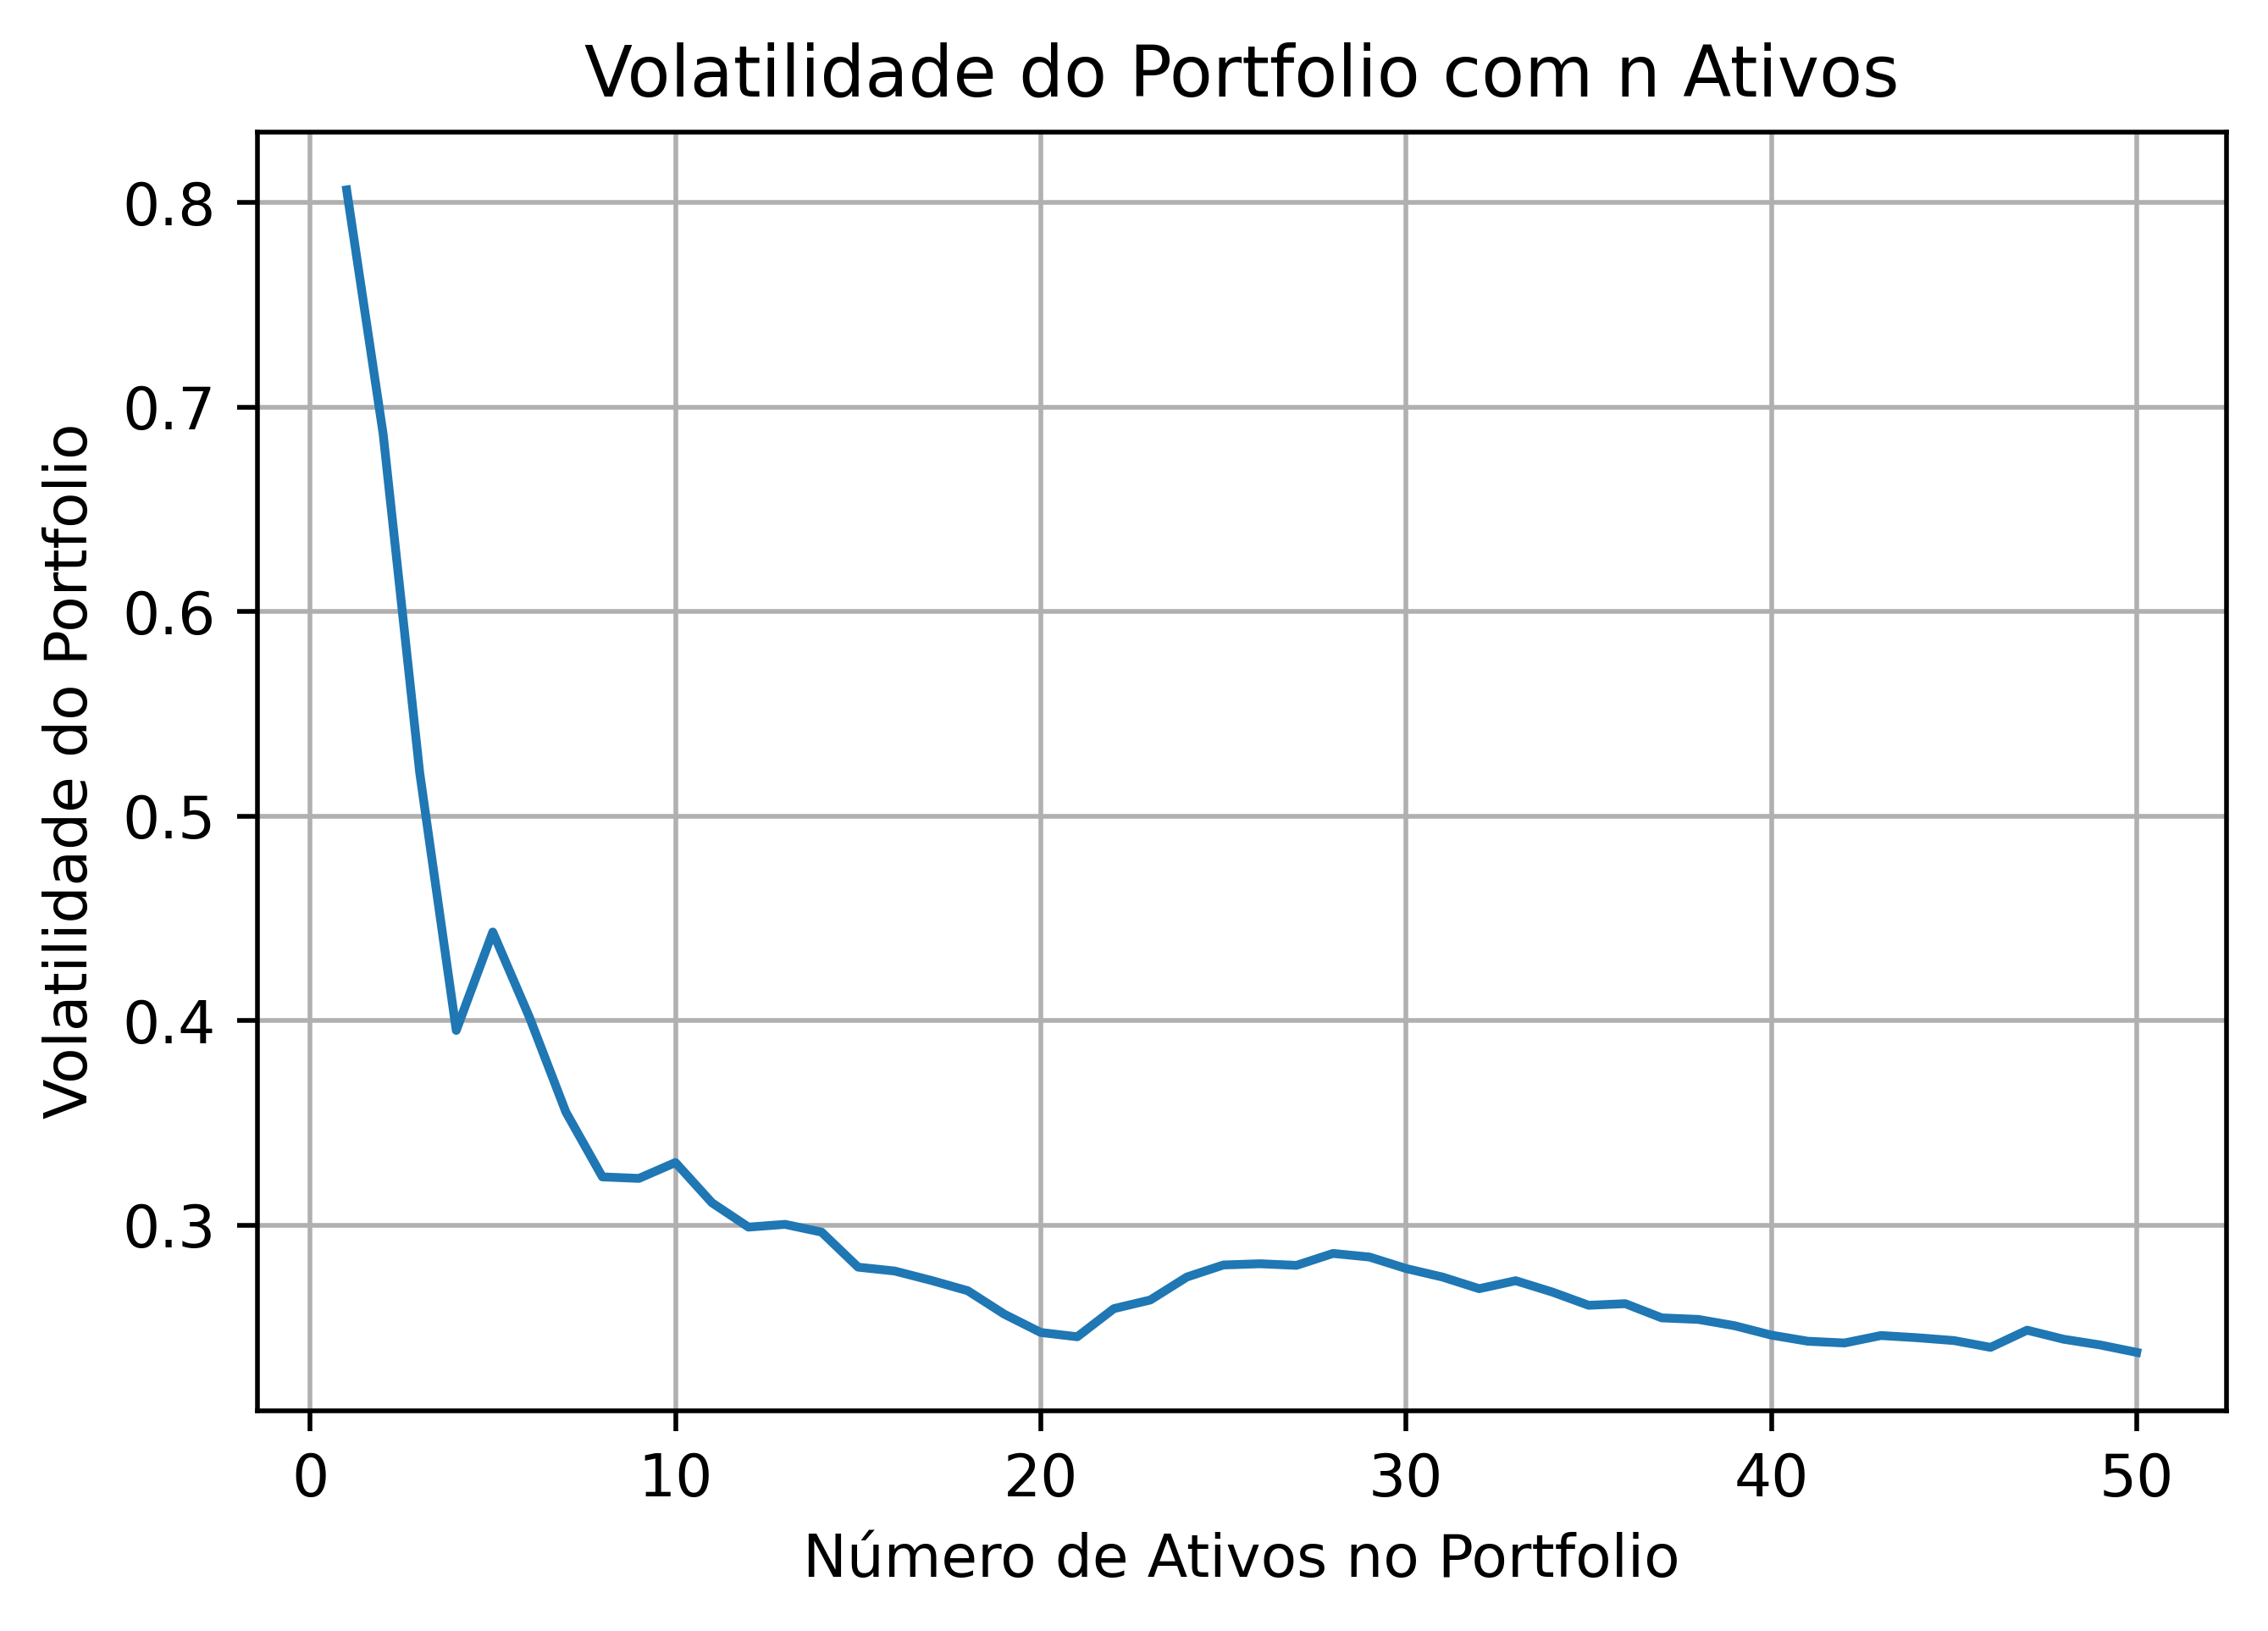

In [127]:
# Criando a lista x para utilizar no gráfico
x = [i + 1 for i in range(len(portfolio))]

fig, ax = plt.subplots(dpi = 500)

plt.plot(x, portfolio_volatility)
plt.title('Volatilidade do Portfolio com n Ativos')
ax.set_xlabel('Número de Ativos no Portfolio')
ax.set_ylabel('Volatilidade do Portfolio')
plt.grid(True)
plt.show()

In [128]:
portfolio

['CTSA3.SA',
 'TEKA4.SA',
 'FESA4.SA',
 'LUXM4.SA',
 'HETA4.SA',
 'UGPA3.SA',
 'CGAS3.SA',
 'EKTR4.SA',
 'HBOR3.SA',
 'DASA3.SA',
 'SAPR4.SA',
 'GOAU3.SA',
 'ALSO3.SA',
 'RAIL3.SA',
 'LIPR3.SA',
 'PINE4.SA',
 'RAPT3.SA',
 'CPFE3.SA',
 'CEDO3.SA',
 'BMEB3.SA',
 'PSSA3.SA',
 'AZUL4.SA',
 'MULT3.SA',
 'GFSA3.SA',
 'PTBL3.SA',
 'KEPL3.SA',
 'CMIG4.SA',
 'JHSF3.SA',
 'HOOT4.SA',
 'DTCY3.SA',
 'CRIV3.SA',
 'CRIV4.SA',
 'VLID3.SA',
 'GSHP3.SA',
 'FRIO3.SA',
 'ELET3.SA',
 'CORR4.SA',
 'ENAT3.SA',
 'FESA3.SA',
 'BEES3.SA',
 'BRIV4.SA',
 'SANB4.SA',
 'OIBR3.SA',
 'BRIV3.SA',
 'UNIP3.SA',
 'REDE3.SA',
 'CVCB3.SA',
 'JOPA4.SA',
 'KLBN4.SA',
 'BALM4.SA']